In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv(r"D:\6-Data Sets\CollegePlacement.csv")
print(df.head())
print(df.info())
print(df.describe())


  College_ID   IQ  Prev_Sem_Result  CGPA  Academic_Performance  \
0    CLG0030  107             6.61  6.28                     8   
1    CLG0061   97             5.52  5.37                     8   
2    CLG0036  109             5.36  5.83                     9   
3    CLG0055  122             5.47  5.75                     6   
4    CLG0004   96             7.91  7.69                     7   

  Internship_Experience  Extra_Curricular_Score  Communication_Skills  \
0                    No                       8                     8   
1                    No                       7                     8   
2                    No                       3                     1   
3                   Yes                       1                     6   
4                    No                       8                    10   

   Projects_Completed Placement  
0                   4        No  
1                   0        No  
2                   1        No  
3                   1       

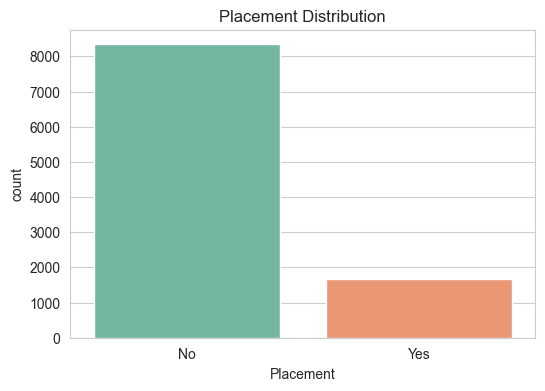

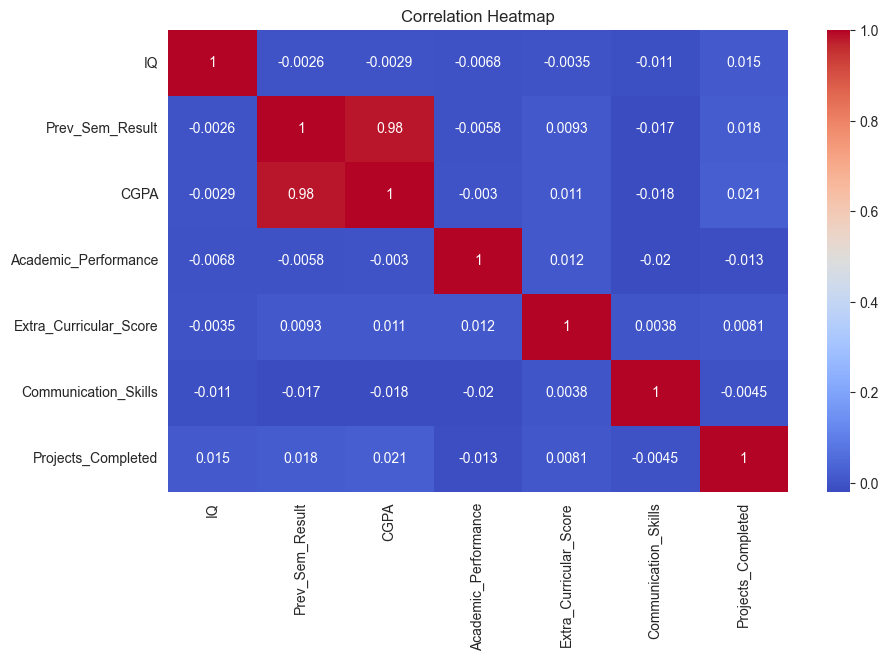

In [3]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Placement', data=df, palette='Set2')
plt.title('Placement Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



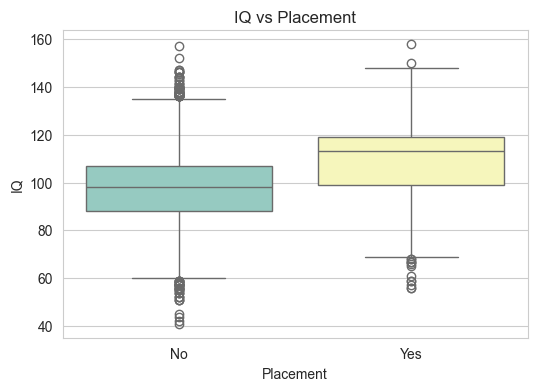

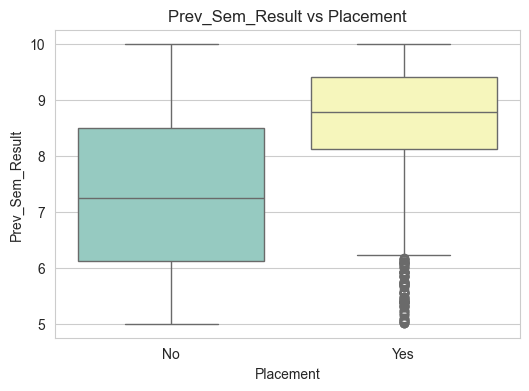

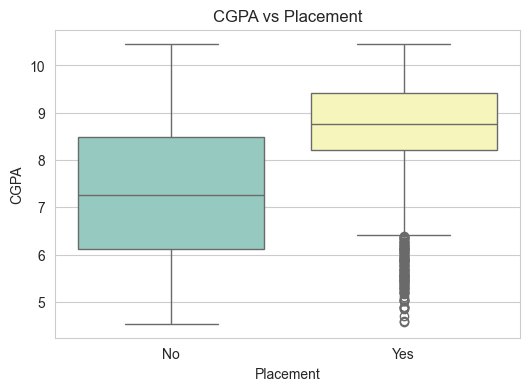

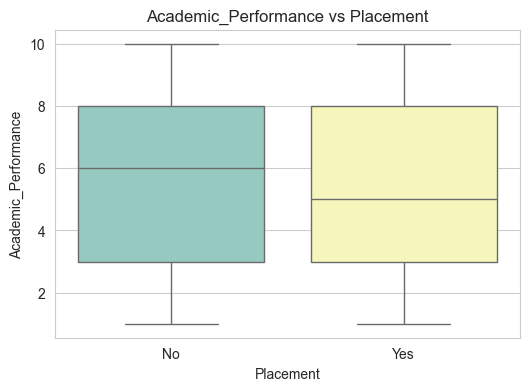

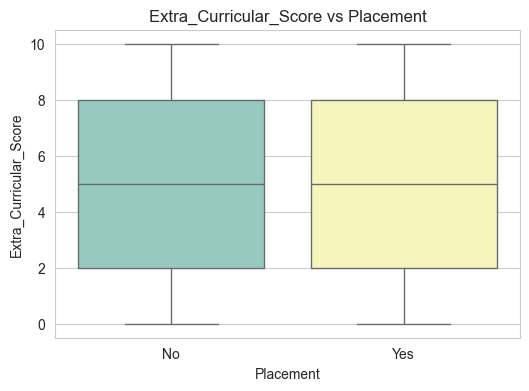

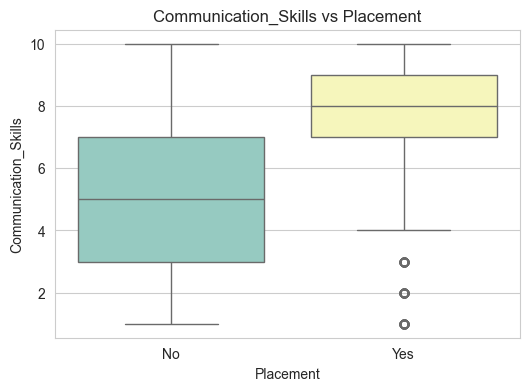

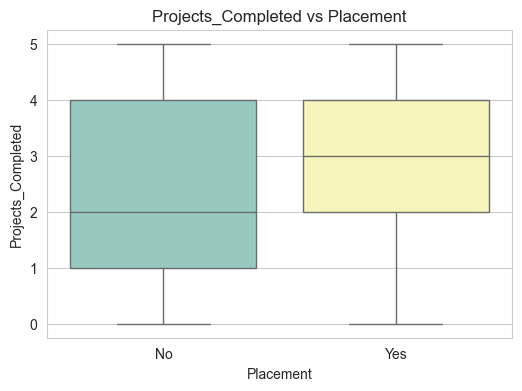

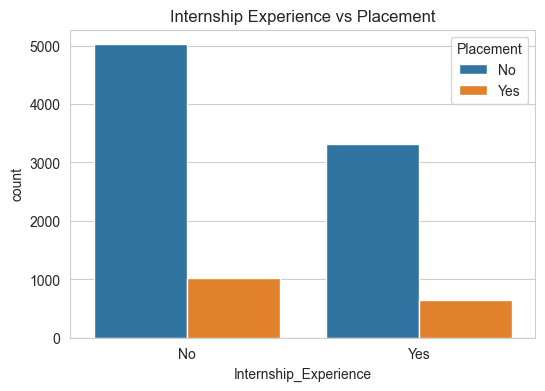

In [4]:
# Boxplot for numerical columns vs Placement
num_cols = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
            'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Placement', y=col, data=df, palette='Set3')
    plt.title(f'{col} vs Placement')
    plt.show()

# Categorical variables
plt.figure(figsize=(6,4))
sns.countplot(x='Internship_Experience', hue='Placement', data=df)
plt.title('Internship Experience vs Placement')
plt.show()


In [5]:
# Drop College_ID (not useful for prediction)
df.drop('College_ID', axis=1, inplace=True)

In [6]:
# Encode categorical columns
le = LabelEncoder()
df['Internship_Experience'] = le.fit_transform(df['Internship_Experience'])  # No=0, Yes=1
df['Placement'] = le.fit_transform(df['Placement'])  # No=0, Yes=1

In [10]:
# Features and target
X = df.drop('Placement', axis=1)
y = df['Placement']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [16]:
y_pred = rf.predict(X_test)

In [17]:
# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.999

Confusion Matrix:
 [[1668    0]
 [   2  330]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1668
           1       1.00      0.99      1.00       332

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



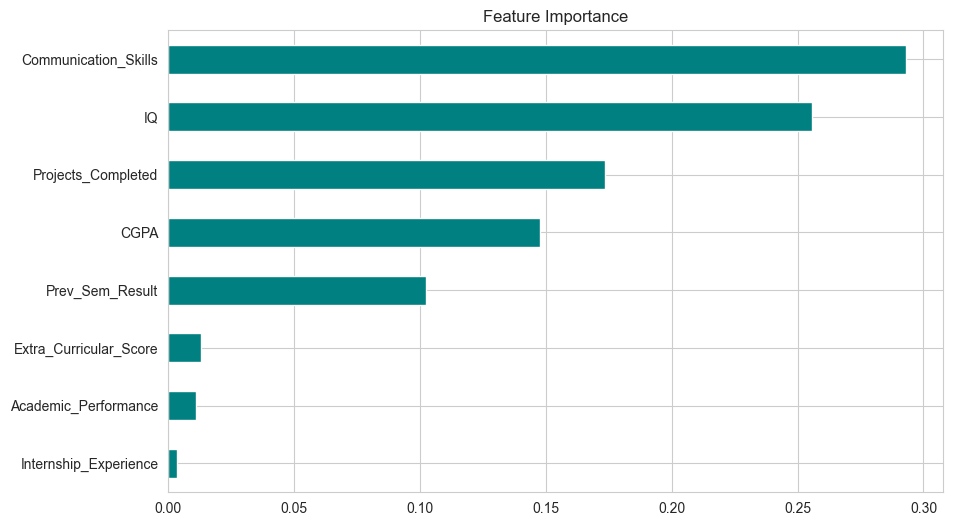

In [18]:
# Feature Importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.show()

In [19]:
# ===========================================================
# 📌 6. HYPERPARAMETER TUNING (Optional)
# ===========================================================
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)

In [20]:
joblib.dump(rf, 'college_placement_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [21]:
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load saved model and scaler
model = joblib.load('college_placement_model.pkl')
scaler = joblib.load('scaler.pkl')

st.set_page_config(page_title="College Placement Predictor", layout="centered")
st.title("🎓 College Placement Predictor")

# Sidebar inputs
st.sidebar.header("Student Information")

IQ = st.sidebar.number_input("IQ", min_value=40, max_value=160, value=100)
Prev_Sem_Result = st.sidebar.number_input("Previous Semester Result", min_value=0.0, max_value=10.0, value=7.5)
CGPA = st.sidebar.number_input("CGPA", min_value=0.0, max_value=10.0, value=7.5)
Academic_Performance = st.sidebar.slider("Academic Performance (1-10)", 1, 10, 5)
Internship_Experience = st.sidebar.selectbox("Internship Experience", ["No", "Yes"])
Extra_Curricular_Score = st.sidebar.slider("Extra Curricular Score (0-10)", 0, 10, 5)
Communication_Skills = st.sidebar.slider("Communication Skills (1-10)", 1, 10, 5)
Projects_Completed = st.sidebar.slider("Projects Completed", 0, 10, 2)

# Convert categorical to numeric
internship = 1 if Internship_Experience == "Yes" else 0

# Create dataframe
data = pd.DataFrame({
    'IQ':[IQ],
    'Prev_Sem_Result':[Prev_Sem_Result],
    'CGPA':[CGPA],
    'Academic_Performance':[Academic_Performance],
    'Internship_Experience':[internship],
    'Extra_Curricular_Score':[Extra_Curricular_Score],
    'Communication_Skills':[Communication_Skills],
    'Projects_Completed':[Projects_Completed]
})

# Scale data
data_scaled = scaler.transform(data)

# Prediction
if st.button("Predict Placement"):
    prediction = model.predict(data_scaled)
    result = "✅ Placed" if prediction[0] == 1 else "❌ Not Placed"
    st.success(f"The student is likely: {result}")


2025-12-19 13:31:38.247 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:31:38.248 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:31:38.407 
  command:

    streamlit run C:\Users\santh\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-19 13:31:38.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:31:38.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:31:38.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-19 13:31:38.411 Thread 'MainThread': missing ScriptRunContext! This wa